# fashion mnist with CNN
<hr/>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\che99\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#import and cut datas
train_data = pd.read_csv('fashion-mnist_train.csv', dtype='float32')
train_data = np.array(train_data)
train_Y = train_data[:,[0]]
train_X = train_data[:,1:]

In [3]:
__author__ = "cheayoung jung <che9992@gmail.com>"
__version__ = "2018-06-01"

class BatchGenerator():
    where = 0
    '''
    usage
    
    var = BatchGenerator(xdata, ydata, batch_size = 100)
    var.x 
    var.y
    var.next()
    
    '''
    
    def __init__(self, x, y, batch_size, one_hot = False, nb_classes = 0):
        self.nb_classes = nb_classes
        self.one_hot = one_hot
        self.x_ = x
        self.y_ = y
        self.batch_size = batch_size
        
        self.total_batch = int(len(x) / batch_size)
        self.x = self.x_[:batch_size,:]
        self.y = self.y_[:batch_size,:]
        self.where = batch_size
        
        if self.one_hot :
            self.set_one_hot()

    def next_batch(self):
        if self.where + self.batch_size > len(self.x_) :
            self.where = 0
            
        self.x = self.x_[self.where:self.where+self.batch_size,:]
        self.y = self.y_[self.where:self.where+self.batch_size,:]
        self.where += self.batch_size
        
        if self.one_hot:
            self.set_one_hot()
        
    def set_one_hot(self):
        self.y = np.int32(self.y)
        one_hot = np.array(self.y).reshape(-1)
        self.y = np.eye(self.nb_classes)[one_hot]

In [62]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, 10])
X_img = tf.reshape(X, [-1, 28, 28, 1])

W1 = tf.Variable(tf.random_normal([8, 8, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')

In [63]:
W2 = tf.Variable(tf.random_normal([8, 8, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')

In [64]:
W3 = tf.Variable(tf.random_normal([5, 5, 64, 128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob=0.7)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [65]:
W4 = tf.Variable(tf.random_normal([4, 4, 128, 256], stddev=0.01))
L4 = tf.nn.conv2d(L3, W4, strides=[1,1,1,1], padding='SAME')
L4 = tf.nn.relu(L4)
L4 = tf.nn.max_pool(L4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [66]:
W5 = tf.Variable(tf.random_normal([3, 3, 256, 512], stddev=0.01))
L5 = tf.nn.conv2d(L4, W5, strides=[1,1,1,1], padding='SAME')
L5 = tf.nn.relu(L5)
L5 = tf.nn.max_pool(L5, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [67]:
L6 = tf.reshape(L5, [-1, 4 * 4 * 512])
W6 = tf.get_variable('W6', shape=[4 * 4 * 512, 10],initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L6, W6) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))
optimizer = tf.train.AdadeltaOptimizer(learning_rate=0.3).minimize(cost)

In [68]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [78]:
batch = BatchGenerator(train_X, train_Y, batch_size=200, nb_classes=10,one_hot=True)
training_epochs = 10

print('Leaning started, It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    for i in range(batch.total_batch):
        feed_dict = {X: batch.x, Y: batch.y}
        c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / batch.total_batch
        batch.next_batch()
    print('Epoch:' '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Leaning started, It takes sometime.
Epoch:0001 cost = 0.011180678
Epoch:0002 cost = 0.010828259
Epoch:0003 cost = 0.009728637
Epoch:0004 cost = 0.009875866
Epoch:0005 cost = 0.009308597
Epoch:0006 cost = 0.008898615
Epoch:0007 cost = 0.008077640
Epoch:0008 cost = 0.008160835
Epoch:0009 cost = 0.007633421
Epoch:0010 cost = 0.008466353


----- TRAIN -----
99.29500063260396 %
----- TEST -----
92.6100002527237 %


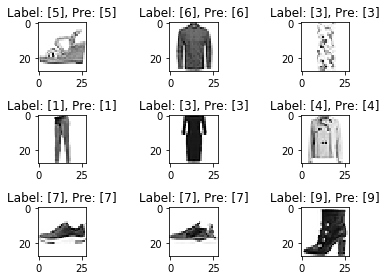

In [82]:
import random
#import and cut datas
test_data = pd.read_csv('fashion-mnist_test.csv', dtype='float32')
test_data = np.array(test_data)
test_Y = test_data[:,[0]]
test_X = test_data[:,1:]

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

test = BatchGenerator(test_X, test_Y, batch_size=200 ,one_hot=True, nb_classes=10)


print('----- TRAIN -----')
accu  = 0
batch = BatchGenerator(train_X, train_Y, batch_size=200, nb_classes=10,one_hot=True)
for i in range(batch.total_batch):
    feed_dict = {X:batch.x, Y:batch.y}
    accu += sess.run(accuracy, feed_dict=feed_dict)
    batch.next_batch()

print( (accu / batch.total_batch) * 100 , '%' )


print('----- TEST -----')
accu  = 0
for i in range(test.total_batch):
    feed_dict = {X:test.x, Y:test.y}
    accu += sess.run(accuracy, feed_dict=feed_dict)
    test.next_batch()

print( (accu / test.total_batch) * 100 , '%' )

for i in range(9):
    
    r = random.randint(0, len(test.x))
    plt.subplot(3,3,i+1)

    plt.title('Label: {}, Pre: {}'.format(sess.run(tf.argmax(test.y[r:r+1], 1)),
                                                  sess.run(tf.argmax(hypothesis, 1), 
                                                           feed_dict={X: test.x[r:r+1]})))
    plt.imshow(test.x[r:r+1].reshape(28, 28),
          cmap = 'Greys', interpolation='nearest')
    plt.tight_layout()